# Gray Level Co-occurence Matrix for CBIR systems
---


**Author:** Aman Hussain  
**Email:** aman@amandavince.me  
**Description:** Texture features (energy, entropy, contrast, inverse difference moment) are computed from the gray level co-occurence matrix of images at a pixel distance of 1 across horizontal, vertical and diagonal axes
___

## Import Libraries

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from skimage import io
from skimage.feature import greycomatrix

%matplotlib inline

## Load Images

In [2]:
img_path = 'OriginalBrodatz/'

In [3]:
def load_image_dir(path):
    images = []
    filenames = []
    for filename in os.listdir(path):
        filenames.append(os.path.join(path,filename))
        img = io.imread(os.path.join(path,filename))
        if img is not None:
            images.append(img)
    return images, filenames

Loaded 112 images from OriginalBrodatz/ 
Displaying a sample...


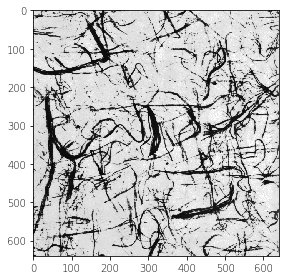

In [4]:
images, filenames = load_image_dir(img_path)
print('Loaded {} images from {} \nDisplaying a sample...'.format(len(images), img_path))
io.imshow(images[10])

## Compute GLCM

In [5]:
distances = [1]
# horizontal, diagonal, vertical
angles = [0, np.pi/4, np.pi/2]

In [6]:
glcm_set = list()
for img in images:
    glcm_set.append(greycomatrix(img, distances,
                                 angles, symmetric=True,
                                 normed=True))

**Sample GLCM**

/home/aman/anaconda3/envs/image/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:74: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


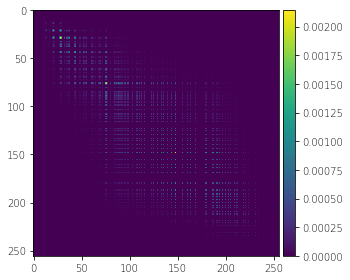

In [7]:
io.imshow(glcm_set[12][:,:,0,1])

## Generate Features using GLCM

In [8]:
def glcm_features(glcm, feat='energy'):
    '''Calculate Texture Features of a GLCM
    
    Features
    --------
    energy
    entropy
    contrast
    inverse difference moment
    '''
    (num_level, num_level2, num_dist, num_angle) = glcm.shape
    assert num_level == num_level2
    assert num_dist > 0
    assert num_angle > 0
    
    # create weights for specified features
    I, J = np.ogrid[0:num_level, 0:num_level]
    if feat in ['contrast', 'inverse difference moment']:
        weights = (I - J) ** 2
        weights = weights.reshape((num_level, num_level, 1, 1))
    elif feat in ['energy', 'entropy']:
        pass
    else:
        raise ValueError('{} is an invalid property'.format(prop))
    
    # compute features for each GLCM
    if feat=='energy':
        asm = np.apply_over_axes(np.sum, (glcm**2),
                                 axes=(0,1))[0,0]
        results = np.sqrt(asm)
    elif feat=='entropy':
        results = np.apply_over_axes(np.sum, (glcm*np.ma.log(glcm)),
                                     axes=(0,1))[0,0]
    elif feat=='contrast':
        results = np.apply_over_axes(np.sum, (glcm * weights),
                                     axes=(0, 1))[0, 0]
    elif feat=='inverse difference moment':
        results = np.apply_over_axes(np.sum, (glcm/(1+weights)),
                                     axes=(0, 1))[0, 0]
    
    return np.round(results.ravel(), 3)                   

In [9]:
glcm_features(glcm_set[0], feat='inverse difference moment')

array([ 0.214,  0.17 ,  0.214])

In [10]:
feature_set = pd.DataFrame(columns=['Image', 'Contrast',
                                    'Inverse Difference Moment',
                                    'Energy', 'Entropy'])

**Begin Feature Generation**

In [11]:
for glcm, name in zip(glcm_set, filenames):
    row = {'Image': name,
          'Contrast': glcm_features(glcm, 'contrast'),
          'Inverse Difference Moment': glcm_features(glcm, 'inverse difference moment'),
          'Energy': glcm_features(glcm, 'energy'),
          'Entropy': glcm_features(glcm, 'entropy')}
    feature_set = feature_set.append(row, ignore_index=True)

## Visualizations

In [12]:
from IPython.core.display import display, HTML
feature_set.loc[:,'Image'] = ["<img src='{}' width='50' height='50'>".format(i) for i in feature_set['Image']]
display(HTML(feature_set.to_html(escape=False)))

,Image,Contrast,Inverse Difference Moment,Energy,Entropy
0,<img src='OriginalBrodatz/D1.gif' width='50' h...,"[450.999, 989.513, 595.24]","[0.214, 0.17, 0.214]","[0.065, 0.058, 0.065]","[-6.285, -6.596, -6.342]"
1,<img src='OriginalBrodatz/D10.gif' width='50' ...,"[1743.208, 2059.183, 958.084]","[0.265, 0.243, 0.29]","[0.124, 0.118, 0.129]","[-5.864, -5.963, -5.719]"
2,<img src='OriginalBrodatz/D100.gif' width='50'...,"[1354.614, 2322.659, 1318.192]","[0.093, 0.07, 0.093]","[0.022, 0.019, 0.022]","[-8.211, -8.454, -8.201]"
3,<img src='OriginalBrodatz/D101.gif' width='50'...,"[1177.771, 2104.86, 1305.049]","[0.445, 0.391, 0.433]","[0.193, 0.177, 0.187]","[-4.694, -4.923, -4.78]"
4,<img src='OriginalBrodatz/D102.gif' width='50'...,"[1181.776, 2065.287, 1260.46]","[0.484, 0.436, 0.483]","[0.195, 0.182, 0.193]","[-4.723, -4.914, -4.751]"
5,<img src='OriginalBrodatz/D103.gif' width='50'...,"[2681.792, 5558.769, 3605.081]","[0.296, 0.198, 0.251]","[0.095, 0.073, 0.085]","[-6.63, -7.001, -6.817]"
6,<img src='OriginalBrodatz/D104.gif' width='50'...,"[2611.758, 5382.499, 3414.543]","[0.276, 0.18, 0.247]","[0.102, 0.081, 0.095]","[-6.464, -6.77, -6.595]"
7,<img src='OriginalBrodatz/D105.gif' width='50'...,"[7274.132, 7887.85, 751.808]","[0.034, 0.031, 0.138]","[0.017, 0.016, 0.032]","[-8.694, -8.737, -7.97]"
8,<img src='OriginalBrodatz/D106.gif' width='50'...,"[8654.089, 9169.822, 1016.342]","[0.027, 0.025, 0.124]","[0.019, 0.019, 0.036]","[-8.505, -8.539, -7.799]"
9,<img src='OriginalBrodatz/D107.gif' width='50'...,"[1653.969, 2890.524, 1812.271]","[0.329, 0.287, 0.329]","[0.111, 0.1, 0.11]","[-6.397, -6.643, -6.444]"


___